#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






Файл с ЭКГ сигналом (ecg.csv) в папке

In [4]:
pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.9 MB/s eta 0:00:00


In [6]:
pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00


In [7]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [127]:
class Experiment:

  def __init__(self, dict):
    self.data = dict['date']
    self.path_signal = dict['signal']
    self.parameters = dict['parameters']
    self.signal = pd.read_csv(self.path_signal)['MLII']

  def get_datе(self):
    print(self.data)

  def get_signal_length(self):
    print(len(self.signal))

  def plot_signal(self):
    plt.plot(self.signal)
    plt.show()

  def _signal_filtration(self):
    self.filtered = hp.filter_signal(self.signal,
                                self.parameters['filtration_parametres']['cutoff'],
                                self.parameters['filtration_parametres']['sample_rate'],
                                self.parameters['filtration_parametres']['order'],
                                self.parameters['filtration_parametres']['filtertype'])
    return self.filtered

  def _signal_find_peaks(self):
    peaks, _ = find_peaks(self.filtered, self.parameters['find_peaks_parametres']['height'])
    return peaks

  def _calculate_RR_intervals(self):
    self._signal_filtration()
    RR_intervals = np.diff(self._signal_find_peaks())/self.parameters['filtration_parametres']['sample_rate']
    return RR_intervals

  def get_RR_statistics(self):
    RR_intervals = self._calculate_RR_intervals()
    return {'mean': np.mean(RR_intervals),
            'std': np.std(RR_intervals),
            'min': min(RR_intervals),
            'max': max(RR_intervals)}

In [128]:
a = Experiment({'date': '2024-10-18',
                'signal': '/content/drive/MyDrive/Colab Notebooks/ecg.csv',
                'parameters': {'filtration_parametres': {'cutoff': [0.75, 3.5],
                                                         'sample_rate': 100,
                                                         'order': 3,
                                                         'filtertype': 'bandpass'},
                                'find_peaks_parametres': {'height': 20}}})

In [129]:
a.get_datе()

2024-10-18


In [130]:
a.get_signal_length()

20000


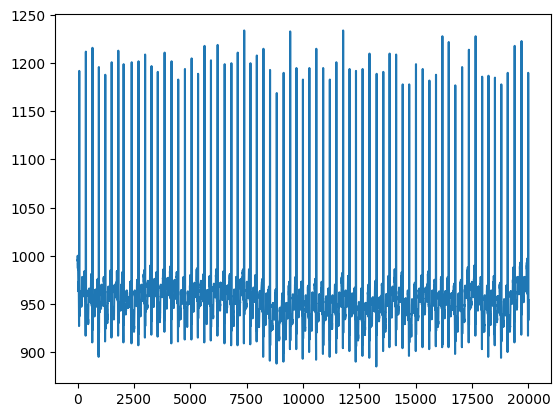

In [131]:
a.plot_signal()

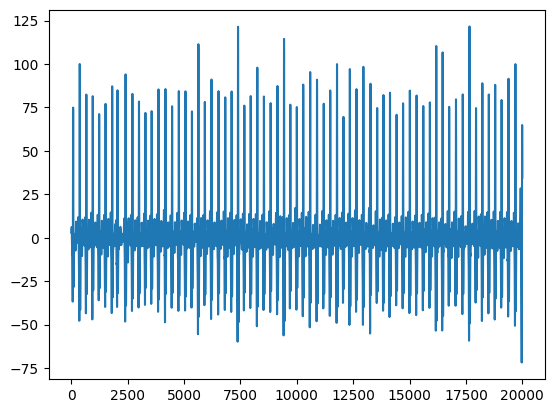

In [132]:
plt.plot(a._signal_filtration())
plt.show()

In [133]:
a._signal_find_peaks()

array([   77,   370,   663,   947,  1231,  1515,  1809,  2045,  2403,
        2706,  2998,  3283,  3560,  3863,  4171,  4466,  4765,  5060,
        5347,  5634,  5918,  6214,  6527,  6824,  7106,  7391,  7670,
        7953,  8246,  8539,  8837,  9141,  9431,  9710,  9998, 10282,
       10591, 10894, 11192, 11480, 11781, 12066, 12350, 12645, 12950,
       13267, 13562, 13842, 14131, 14423, 14711, 15011, 15310, 15607,
       15900, 16183, 16465, 16755, 17058, 17358, 17657, 17947, 18227,
       18514, 18796, 19081, 19388, 19693, 19926, 19992])

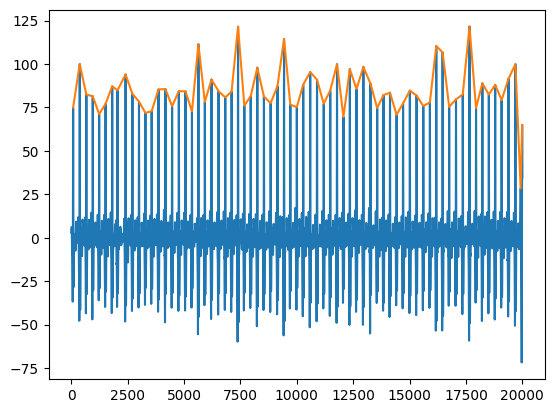

In [134]:
plt.plot(a._signal_filtration())
plt.plot(a._signal_find_peaks(), a._signal_filtration()[a._signal_find_peaks()])
plt.show()

In [135]:
a._calculate_RR_intervals()

array([2.93, 2.93, 2.84, 2.84, 2.84, 2.94, 2.36, 3.58, 3.03, 2.92, 2.85,
       2.77, 3.03, 3.08, 2.95, 2.99, 2.95, 2.87, 2.87, 2.84, 2.96, 3.13,
       2.97, 2.82, 2.85, 2.79, 2.83, 2.93, 2.93, 2.98, 3.04, 2.9 , 2.79,
       2.88, 2.84, 3.09, 3.03, 2.98, 2.88, 3.01, 2.85, 2.84, 2.95, 3.05,
       3.17, 2.95, 2.8 , 2.89, 2.92, 2.88, 3.  , 2.99, 2.97, 2.93, 2.83,
       2.82, 2.9 , 3.03, 3.  , 2.99, 2.9 , 2.8 , 2.87, 2.82, 2.85, 3.07,
       3.05, 2.33, 0.66])

In [136]:
a.get_RR_statistics()

{'mean': 2.8862318840579713,
 'std': 0.3107732359789018,
 'min': 0.66,
 'max': 3.58}